# Import Packages

In [14]:
import pandas as pd
import numpy as np
import pingouin as pg
from scipy import stats

import matplotlib.pyplot as plt
from pylab import mpl
import seaborn as sns

In [15]:
pd.option_context('mode.use_inf_as_na', True)

plt.rcParams['font.family']=['Arial','serif', 'Times New Roman']
plt.style.use('default')
mpl.rcParams["axes.unicode_minus"] = False
%config InlineBackend.figure_format = 'svg'


# Load Data

In [16]:
symbol_type = ['', 'P','I','T']
symbol_combination = [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]

total_number = {}
error_number = {}
error_rate = {}

for symbol in symbol_combination:
    total_number[symbol] = [0] * 27
    error_number[symbol] = [0] * 27
    error_rate[symbol] = [0] * 27

path = "../data/BehaviorData/Subject_"
for subject in range(0, 27):
    file_name = path + str(subject+1) + '.csv'
    tmp = pd.read_csv(file_name)
    
    marker1 = tmp['marker1'].to_list()
    marker2 = tmp['marker2'].to_list()
    answer = tmp['user_answer.corr'].to_list()
    
    for index, ans in enumerate(answer):
        symbol = ( symbol_type[int(str(marker1[index])[1])] + '-' + symbol_type[int(str(marker2[index])[1])] )

        total_number[symbol][subject] += 1
        if ans == 0:
            error_number[symbol][subject] += 1
        
    for symbol in symbol_combination:
        error_rate[symbol][subject] = error_number[symbol][subject] / total_number[symbol][subject]

total_error_number = 0
for symbol in symbol_combination:
    total_error_number += np.sum(error_number[symbol])
    print(symbol, np.sum(error_number[symbol]), np.sum(error_rate[symbol]).round(4))

print('\n', total_error_number )

P-P 10 0.1931
I-I 16 0.3184
T-T 28 0.5792
P-I 15 0.2929
I-P 15 0.3016
P-T 18 0.3819
T-P 28 0.5542
I-T 16 0.3345
T-I 17 0.3264

 163


In [17]:
error_rate_data = { 'type':[], 'subject':[], 'error_rate':[] }

for symbol in error_rate:
    rate = error_rate[symbol]

    for index, r in enumerate(rate):
        error_rate_data['type'].append(symbol)
        error_rate_data['subject'].append(index+1)
        error_rate_data['error_rate'].append(r*100.0)

error_rate_data = pd.DataFrame(error_rate_data)
print(error_rate_data.head())
print(error_rate_data.tail())

  type  subject  error_rate
0  P-P        1    0.000000
1  P-P        2    1.923077
2  P-P        3    0.000000
3  P-P        4    0.000000
4  P-P        5    0.000000
    type  subject  error_rate
238  T-I       23    0.000000
239  T-I       24    0.000000
240  T-I       25    1.886792
241  T-I       26    0.000000
242  T-I       27    0.000000


# Plot Data

In [18]:
font = {'family' : ['Arial', 'Times new roman', 'Microsoft YaHei'],
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 9,
        } 
font_s = {'family': ['Arial', 'Times new roman', 'Microsoft YaHei'],
        'color'  : 'k',
        'weight' : 'normal',
        'size'   : 8,
        } 

In [19]:
# colors = sns.color_palette('pastel')
# trans = 0.6
# barplot_color = [colors[0].__add__((trans,)), colors[0].__add__((trans,)), colors[0].__add__((trans,)), 
#                  colors[1].__add__((trans,)), colors[1].__add__((trans,)), 
#                  colors[2].__add__((trans,)), colors[2].__add__((trans,)), 
#                  colors[3].__add__((trans,)), colors[3].__add__((trans,)),]

alpha = 1.0
barplot_color = [(210/255, 52/255, 52/255, alpha), (210/255, 52/255, 52/255, alpha), (210/255, 52/255, 52/255, alpha),
                 (30/255, 119/255, 168/255, alpha),(30/255, 119/255, 168/255, alpha),
                 (49/255, 156/255, 79/255, alpha),(49/255, 156/255, 79/255, alpha),
                 (137/255, 104/255, 171/255, alpha),(137/255, 104/255, 171/255, alpha)]  #252/255, 93/255, 36/255

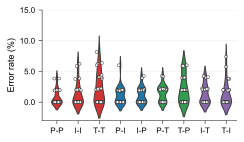

In [20]:
labels = [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]

fig,ax = plt.subplots(figsize=(3.5, 2.0),facecolor="w") #dpi=100

ax = sns.violinplot(data=error_rate_data, x='type', y='error_rate', order=labels, ax=ax,
                    fill=True, palette=barplot_color, linewidth=1.0, 
                    width=0.5, inner=None, hue='type', legend=False, color='k', saturation=1.0
                 )

sns.stripplot(data=error_rate_data, x='type', y='error_rate', size=3.0, jitter=0.15, alpha=0.8, #hue='type',
              color=[1.0,1.0,1.0,1.0], edgecolor='k', linewidth=0.5, legend=False,) #palette=barplot_color,

ax.grid(axis='y',ls=':',c='gray', linewidth=0.2, zorder=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(0.5)
ax.spines['left'].set_linewidth(0.5)
ax.tick_params(which='both', bottom=True, top=False, left=True, right=False,
               labelbottom=True, labelleft=True, direction='out',width=0.5)
  
plt.ylabel("Error rate (%)", fontdict=font)
plt.xlabel("")

plt.xlim(-0.7, 8.5)
plt.ylim(-3.0, 15)
plt.xticks([0,1,2,3,4,5,6,7,8], labels, fontdict=font_s);
plt.yticks([0.0,5.0,10.0,15.0 ], [0.0,5.0,10.0,15.0], fontdict=font_s); 

# Normality Test

In [21]:
pg.normality(data=error_rate_data, dv='error_rate', group='type', method='shapiro')

,W,pval,normal
type,,,
P-P,0.627634,4.422127e-07,False
I-I,0.684493,2.376746e-06,False
T-T,0.815053,2.523650e-04,False
P-I,0.688664,2.707289e-06,False
I-P,0.758568,2.840308e-05,False
P-T,0.779707,6.215087e-05,False
T-P,0.794173,1.086716e-04,False
I-T,0.745702,1.795325e-05,False
T-I,0.674264,1.734270e-06,False


In [22]:
data_levene = []

for tp in [ 'P-P', 'I-I', 'T-T', 'P-I', 'I-P', 'P-T', 'T-P', 'I-T', 'T-I' ]:
    tmp = error_rate_data[error_rate_data['type']==tp]['error_rate']
    data_levene.append(tmp)

    # normality test
    print(stats.shapiro(tmp))

# Levene's Test for Equality of Variances
print('\n')
print(stats.levene(*data_levene))

ShapiroResult(statistic=0.6276341080665588, pvalue=4.4221272332833905e-07)
ShapiroResult(statistic=0.6844931840896606, pvalue=2.3767456696077716e-06)
ShapiroResult(statistic=0.8150526285171509, pvalue=0.00025236496003344655)
ShapiroResult(statistic=0.6886637806892395, pvalue=2.7072892407886684e-06)
ShapiroResult(statistic=0.7585684061050415, pvalue=2.8403082978911698e-05)
ShapiroResult(statistic=0.7797067761421204, pvalue=6.215087341843173e-05)
ShapiroResult(statistic=0.7941731810569763, pvalue=0.00010867164382943884)
ShapiroResult(statistic=0.745701789855957, pvalue=1.7953247152036056e-05)
ShapiroResult(statistic=0.6742640733718872, pvalue=1.734269631015195e-06)


LeveneResult(statistic=2.1711970753098657, pvalue=0.030444956141326317)


# Repeated measures ANOVA

In [23]:
# pg.rm_anova(data=subject_avg_rt, dv='time', within='type', subject='subject', detailed=True, correction=True, effsize='np2')

print(len(error_rate_data))

# Non parametric test
pg.friedman(data=error_rate_data, dv='error_rate', within='type', subject='subject', method='chisq')

243


,Source,W,ddof1,Q,p-unc
Friedman,type,0.096127,8,20.76341,0.007803


# Pairwise multiple comparison

In [24]:
# Wilcoxon signed-rank test and Benjamini/Hochberg FDR correction

res = pg.pairwise_tests(data=error_rate_data, dv='error_rate', within='type', subject='subject', parametric=False, padjust='fdr_bh', 
                        effsize='cohen').round(3)

for index, r in res.iterrows():
    if r['p-corr'] < 0.1:
        print(r['A'], r['B'], r['p-corr'])

pg.pairwise_tests(data=error_rate_data, dv='error_rate', within='type', subject='subject', parametric=False, padjust='fdr_bh', 
                        effsize='cohen').round(3)

P-P T-P 0.063
P-P T-T 0.063


d:\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "
d:\Anaconda3\Lib\site-packages\scipy\stats\_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


,Contrast,A,B,Paired,Parametric,W-val,alternative,p-unc,p-corr,p-adjust,cohen
0,type,I-I,I-P,True,False,57.0,two-sided,0.887,0.938,fdr_bh,0.039
1,type,I-I,I-T,True,False,51.0,two-sided,0.236,0.425,fdr_bh,-0.035
2,type,I-I,P-I,True,False,87.5,two-sided,0.524,0.617,fdr_bh,0.058
3,type,I-I,P-P,True,False,30.0,two-sided,0.295,0.442,fdr_bh,0.296
4,type,I-I,P-T,True,False,46.0,two-sided,0.155,0.350,fdr_bh,-0.146
5,type,I-I,T-I,True,False,53.5,two-sided,0.733,0.799,fdr_bh,-0.016
6,type,I-I,T-P,True,False,30.0,two-sided,0.052,0.188,fdr_bh,-0.419
7,type,I-I,T-T,True,False,39.5,two-sided,0.047,0.188,fdr_bh,-0.437
8,type,I-P,I-T,True,False,64.5,two-sided,0.372,0.535,fdr_bh,-0.085
9,type,I-P,P-I,True,False,83.0,two-sided,0.643,0.723,fdr_bh,0.024
